In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from statsmodels.tsa.seasonal import seasonal_decompose

In [3]:
PATH = r'C:\Users\luizz\Documents\GitHub\portfolio\coffee-series-models\data\raw\coffee_word_bank.xlsx'

df = pd.read_excel(PATH)
df.head()


,date,price
0,1960-01-01,0.9409
1,1960-02-01,0.9469
2,1960-03-01,0.9281
3,1960-04-01,0.9303
4,1960-05-01,0.9200


In [4]:
df.tail()

,date,price
774,2024-07-01,5.668078
775,2024-08-01,5.763759
776,2024-09-01,6.124655
777,2024-10-01,6.101727
778,2024-11-01,6.723650


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 779 entries, 0 to 778
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    779 non-null    datetime64[ns]
 1   price   779 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 12.3 KB


<Axes: xlabel='date'>

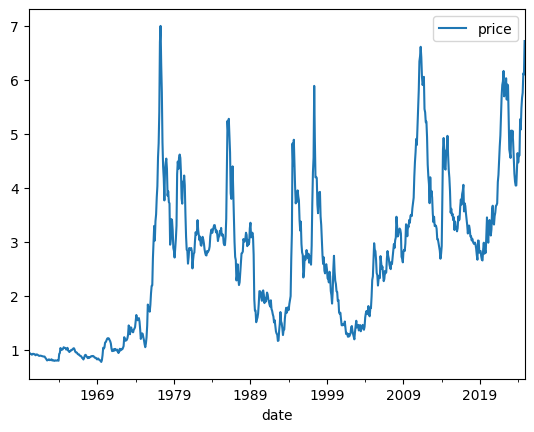

In [6]:
df.plot(kind='line', x='date', y='price')

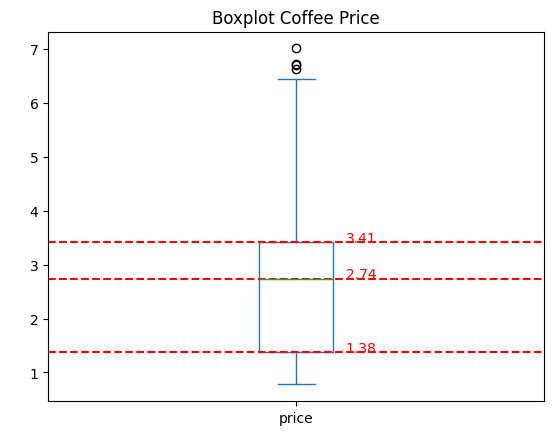

In [7]:
df.plot(kind='box', y='price', )
plt.title('Boxplot Coffee Price')
plt.ylabel(' ')


# Adicionar quantis
quantis = df['price'].quantile([0.25, 0.5, 0.75])
for q in quantis:
    plt.axhline(y=q, color='r', linestyle='--')
    plt.text(1.1, q, f'{q:.2f}', color='red')

plt.show()

<Axes: xlabel='date', ylabel='price'>

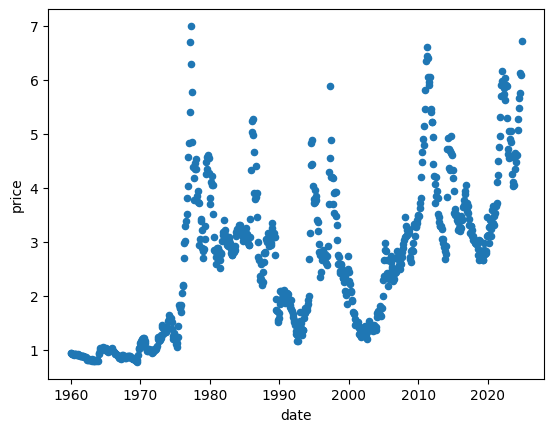

In [8]:
df.plot(kind='scatter', x='date', y='price')

In [9]:
df['price'].describe()

count    779.000000
mean       2.647307
std        1.388668
min        0.777600
25%        1.375468
50%        2.735700
75%        3.414515
max        7.003600
Name: price, dtype: float64

In [10]:
print(df.head())

        date   price
0 1960-01-01  0.9409
1 1960-02-01  0.9469
2 1960-03-01  0.9281
3 1960-04-01  0.9303
4 1960-05-01  0.9200


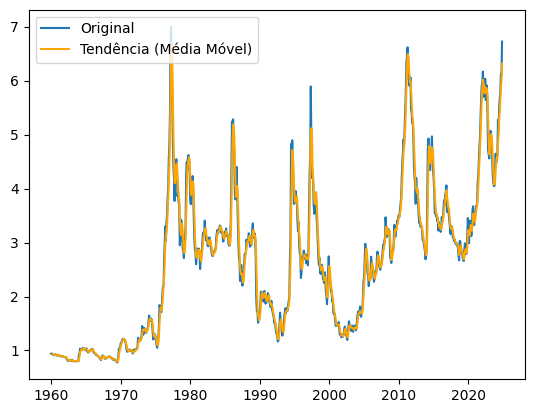

In [11]:
df.set_index('date', inplace=True, drop=True)

rolling_mean = df.rolling(window=3).mean()

plt.plot(df['price'], label='Original')
plt.plot(rolling_mean['price'], label='Tendência (Média Móvel)', color='orange')
plt.legend()
plt.show()

In [12]:
print(df.head())

             price
date              
1960-01-01  0.9409
1960-02-01  0.9469
1960-03-01  0.9281
1960-04-01  0.9303
1960-05-01  0.9200


<Axes: title={'center': 'Tendência Extraída'}, xlabel='date'>

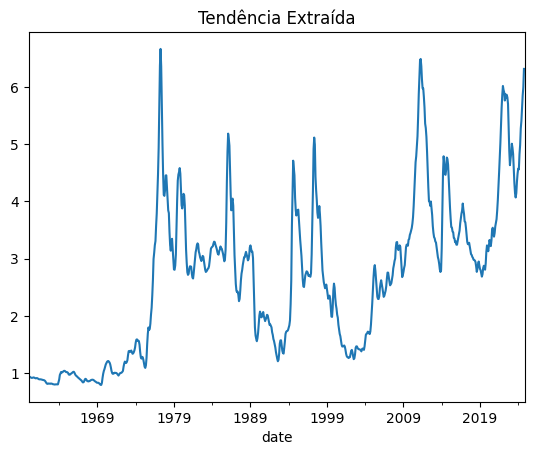

In [13]:
result = seasonal_decompose(df, model='additive', period=3)
result.trend.plot(title='Tendência Extraída')

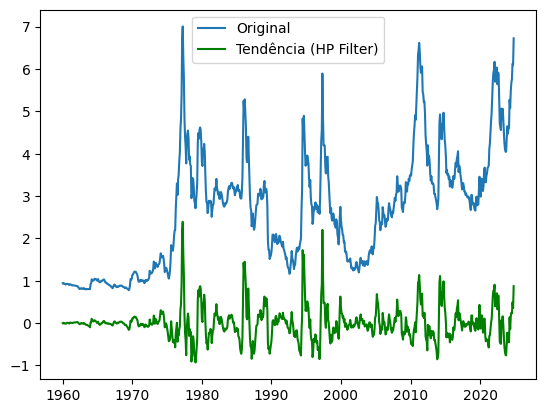

In [14]:
import statsmodels.api as sm

trend, cycle = sm.tsa.filters.hpfilter(df)
plt.plot(df, label='Original')
plt.plot(trend, label='Tendência (HP Filter)', color='green')
plt.legend()
plt.show()

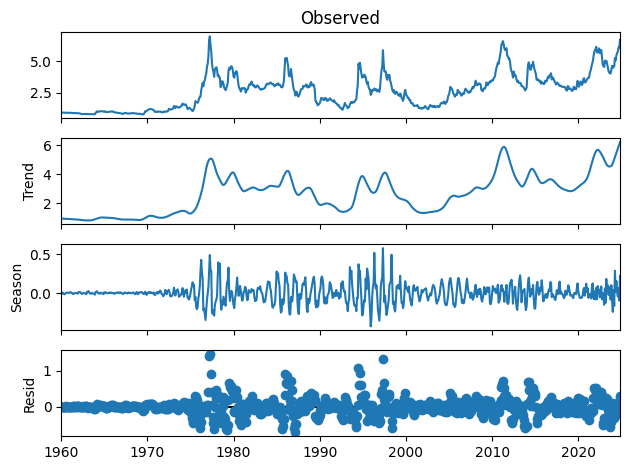

In [28]:
from statsmodels.tsa.seasonal import STL

stl = STL(df, seasonal=7)
result = stl.fit()

fig = result.plot()
plt.show()

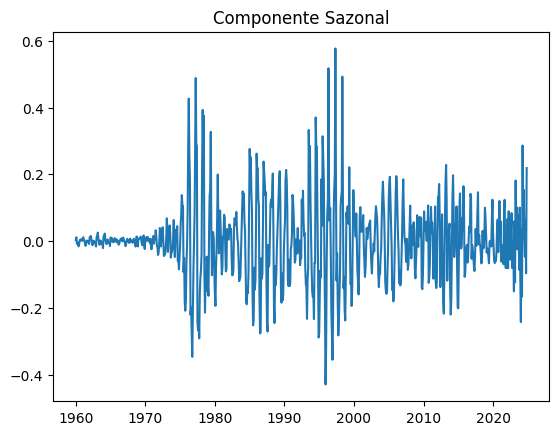

In [16]:
plt.plot(result.seasonal)
plt.title('Componente Sazonal')
plt.show()

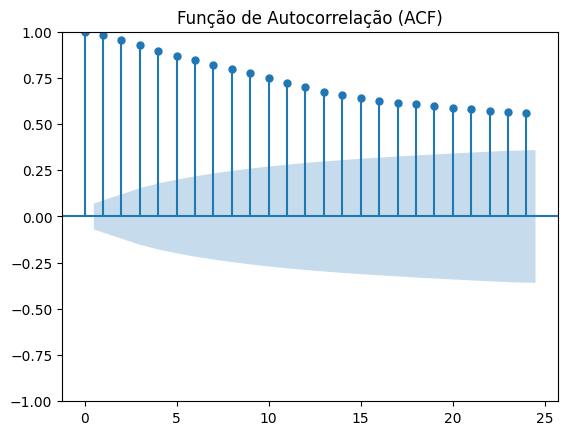

In [17]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(df, lags=24)
plt.title("Função de Autocorrelação (ACF)")
plt.show()

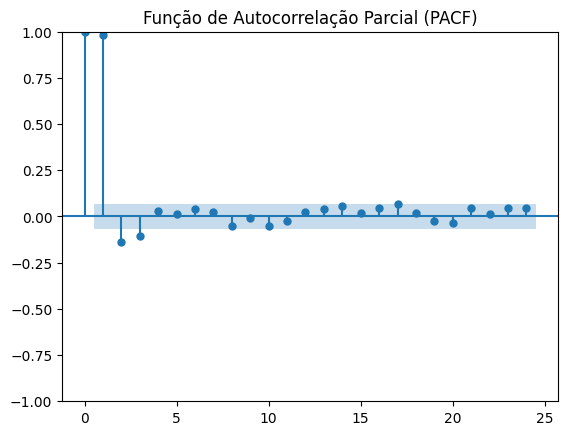

In [18]:
plot_pacf(df, lags=24)
plt.title("Função de Autocorrelação Parcial (PACF)")
plt.show()

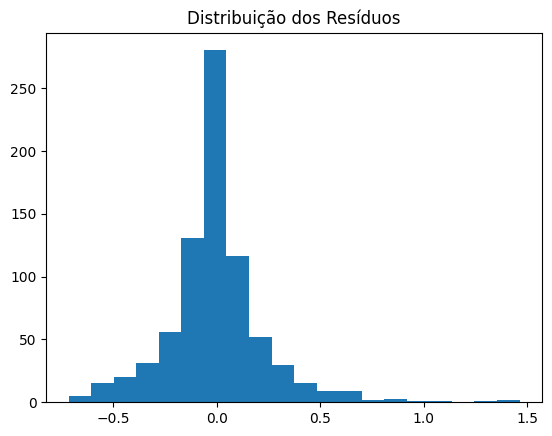

Shapiro-Wilk Teste p-valor: 0.0000


In [19]:
from scipy.stats import shapiro

residuals = result.resid
plt.hist(residuals, bins=20)
plt.title("Distribuição dos Resíduos")
plt.show()

# Teste de normalidade dos resíduos
stat, p_value = shapiro(residuals)
print(f"Shapiro-Wilk Teste p-valor: {p_value:.4f}")

In [20]:
residuals

date
1960-01-01   -0.002377
1960-02-01   -0.001807
1960-03-01    0.001332
1960-04-01    0.001606
1960-05-01    0.002722
                ...   
2024-07-01    0.057154
2024-08-01    0.061006
2024-09-01    0.160442
2024-10-01    0.143095
2024-11-01    0.292987
Name: resid, Length: 779, dtype: float64

In [21]:
from statsmodels.tsa.stattools import adfuller

result_adf = adfuller(df)
print(f"ADF Statistic: {result_adf[0]:.4f}")
print(f"p-Value: {result_adf[1]:.4f}")

ADF Statistic: -1.6632
p-Value: 0.4502


In [22]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Ensure the data is numeric
df_numeric = df.apply(pd.to_numeric, errors='coerce')

# Select the 'price' column for the SARIMAX model
price_series = df_numeric['price']

# Ajuste do modelo SARIMA (1,1,1) x (1,1,1,12)
model = SARIMAX(price_series, 
                 order=(1, 1, 1), 
                 seasonal_order=(1, 1, 1, 12)
                )
result = model.fit(disp=False)

# Exibir sumário do modelo ajustado
print(result.summary())


c:\Users\luizz\AppData\Local\pypoetry\Cache\virtualenvs\coffee-series-ZLkgSkF1-py3.11\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\luizz\AppData\Local\pypoetry\Cache\virtualenvs\coffee-series-ZLkgSkF1-py3.11\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                              price   No. Observations:                  779
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                  48.242
Date:                            Tue, 15 Apr 2025   AIC                            -86.484
Time:                                    10:58:45   BIC                            -63.278
Sample:                                01-01-1960   HQIC                           -77.551
                                     - 11-01-2024                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4714      0.072      6.528      0.000       0.330       0.613
ma.L1         -0.2343      0.083   

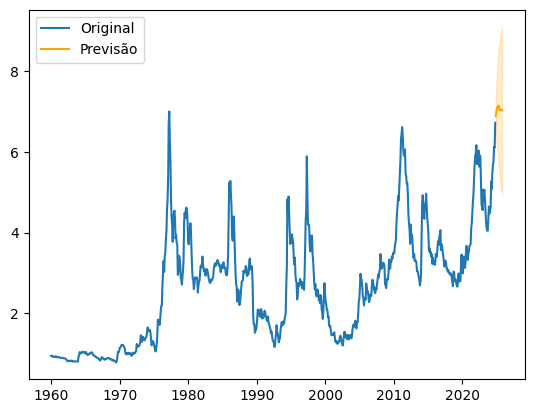

In [23]:
forecast = result.get_forecast(steps=12)
forecast_ci = forecast.conf_int()

plt.plot(price_series, label='Original')
plt.plot(forecast.predicted_mean, label='Previsão', color='orange')
plt.fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='orange', alpha=0.2)
plt.legend()
plt.show()

In [24]:
forecast_ci

,lower price,upper price
2024-12-01,6.453892,7.322727
2025-01-01,6.308665,7.690742
2025-02-01,6.178011,7.989995
2025-03-01,6.029683,8.212755
2025-04-01,5.871604,8.381849
2025-05-01,5.750141,8.554096
2025-06-01,5.556098,8.627742
2025-07-01,5.380638,8.699299
2025-08-01,5.268108,8.817009
2025-09-01,5.170953,8.936207


In [25]:
from sklearn.metrics import mean_absolute_error, root_mean_squared_error

forecast_values = forecast.predicted_mean
mae = mean_absolute_error(price_series[-12:], forecast_values)
rmse = root_mean_squared_error(price_series[-12:], forecast_values)

print(f"MAE: {mae:.4f}, RMSE: {rmse:.4f}")

MAE: 1.6762, RMSE: 1.8154


In [26]:
from sklearn.model_selection import train_test_split
from statsmodels.tsa.statespace.sarimax import SARIMAX
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, root_mean_squared_error

class TimeSeriesForecaster:
    def __init__(self, df):
        """
        Inicializa o forecaster com DataFrame contendo colunas 'date' e 'price'
        """
        self.df = df.copy()
        self.df['date'] = pd.to_datetime(self.df['date'])
        self.models = {}
        self.metrics = {}

    def prepare_data(self, test_size=0.2):
        """Prepara os dados para treinamento e teste"""
        train_size = int(len(self.df) * (1 - test_size))
        self.train = self.df.iloc[:train_size]
        self.test = self.df.iloc[train_size:]

    def fit_sarima(self):
        """Treina modelo SARIMA"""
        model = SARIMAX(self.train['price'],
                       order=(1, 1, 1),
                       seasonal_order=(1, 1, 1, 12))
        self.models['sarima'] = model.fit(disp=False)

    def fit_prophet(self):
        """Treina modelo Prophet"""
        df_prophet = self.train.copy()
        df_prophet.columns = ['ds', 'y']
        model = Prophet(yearly_seasonality=True)
        self.models['prophet'] = model.fit(df_prophet)

    def make_predictions(self, model_name, periods=30):
        """Faz previsões usando o modelo especificado"""
        if model_name == 'sarima':
            forecast = self.models[model_name].forecast(len(self.test))
            return forecast
        
        elif model_name == 'prophet':
            future = self.models[model_name].make_future_dataframe(periods=periods)
            forecast = self.models[model_name].predict(future)
            return forecast.tail(periods)['yhat']

    def evaluate_models(self):
        """Avalia o desempenho dos modelos"""
        for name in self.models.keys():
            predictions = self.make_predictions(name, len(self.test))
            self.metrics[name] = {
                'MAE': mean_absolute_error(self.test['price'], predictions),
                'RMSE': root_mean_squared_error(self.test['price'], predictions)
            }
        return self.metrics

    def plot_forecasts(self):
        """Plota as previsões de todos os modelos"""
        plt.figure(figsize=(15, 7))
        plt.plot(self.train.index, self.train['price'], label='Treino')
        plt.plot(self.test.index, self.test['price'], label='Teste')
        
        for name in self.models.keys():
            predictions = self.make_predictions(name, len(self.test))
            plt.plot(self.test.index, predictions, label=f'Previsão {name}')
        
        plt.title('Comparação das Previsões')
        plt.legend()
        plt.show()

c:\Users\luizz\AppData\Local\pypoetry\Cache\virtualenvs\coffee-series-ZLkgSkF1-py3.11\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [27]:
forecaster = TimeSeriesForecaster(df)
forecaster.prepare_data()
forecaster.fit_sarima()
forecaster.fit_prophet()
metrics = forecaster.evaluate_models()
forecaster.plot_forecasts()

KeyError: 'date'

614/614 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - loss: 0.0118
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Train RMSE: 0.40644097082438646
Test RMSE: 0.4101250032090292
Train MAE: 0.2683213383419534
Test MAE: 0.31463410507905637
Train MAPE: 0.12119037811168239
Test MAPE: 0.07729513893530422


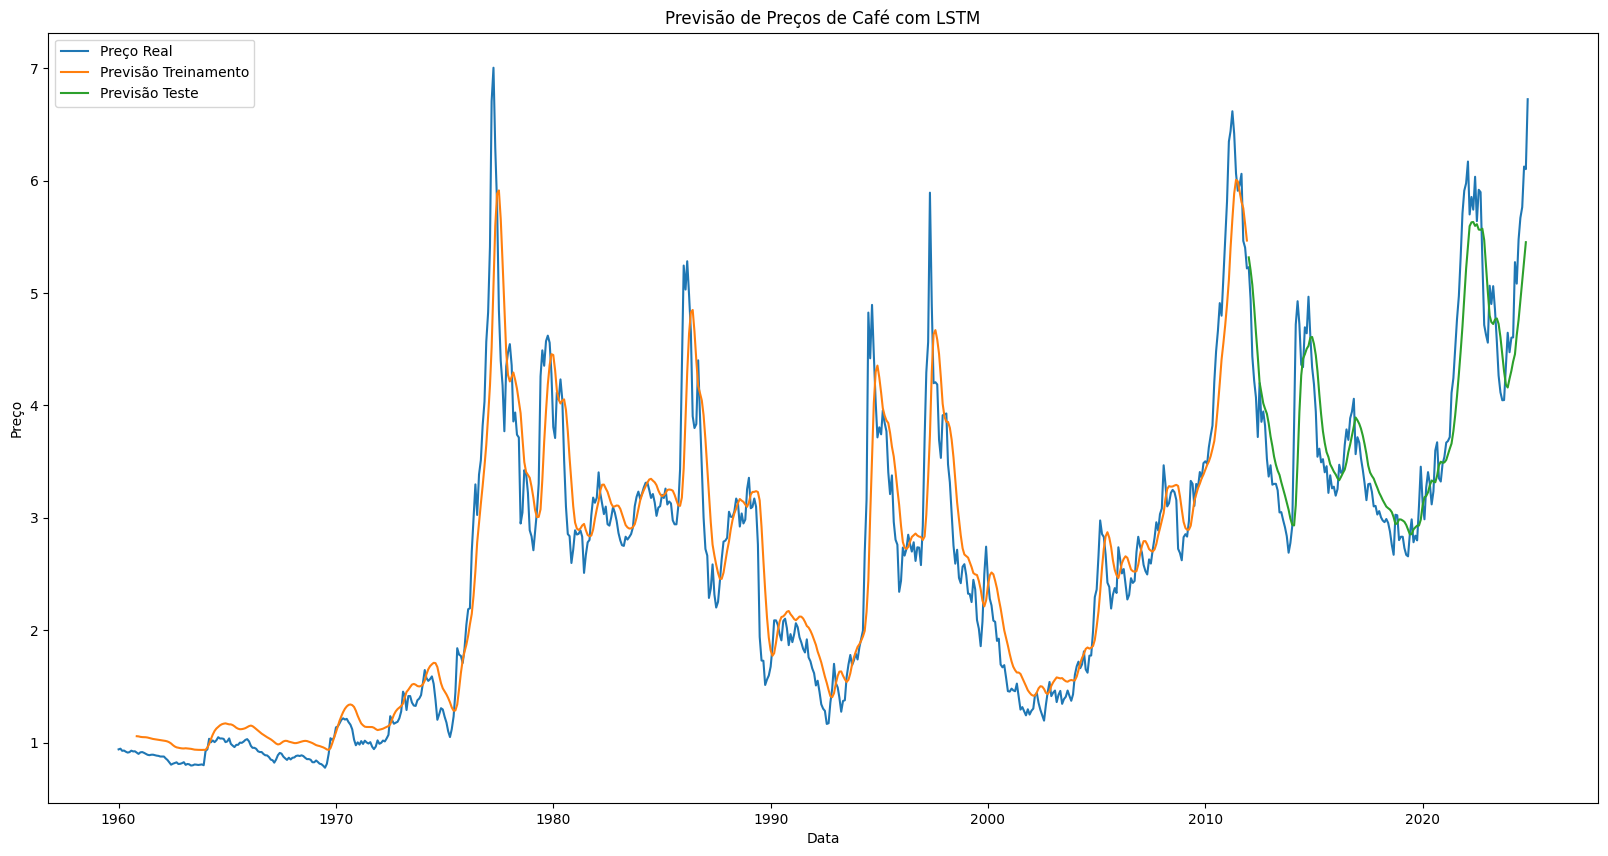

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler

# Verificar se a coluna 'date' existe, caso contrário, criar a partir do índice
if 'date' not in df.columns:
    df['date'] = df.index

# Escalar os dados
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df['price'].values.reshape(-1, 1))

# Preparar os dados para o modelo LSTM
def create_dataset(data, time_step=1):
    X, Y = [], []
    for i in range(len(data) - time_step - 1):
        a = data[i:(i + time_step), 0]
        X.append(a)
        Y.append(data[i + time_step, 0])
    return np.array(X), np.array(Y)

time_step = 10
X, Y = create_dataset(scaled_data, time_step)

# Redimensionar os dados para [samples, time steps, features]
X = X.reshape(X.shape[0], X.shape[1], 1)

# Dividir os dados em conjuntos de treinamento e teste
train_size = int(len(X) * 0.8)
test_size = len(X) - train_size
X_train, X_test = X[:train_size], X[train_size:]
Y_train, Y_test = Y[:train_size], Y[train_size:]

# Criar o modelo LSTM
model = Sequential()
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(25))
model.add(Dense(1))

# Compilar o modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Treinar o modelo
model.fit(X_train, Y_train, batch_size=1, epochs=1)

# Fazer previsões
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Inverter a escala das previsões
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

# Calcular o RMSE
train_rmse = np.sqrt(np.mean((train_predict - scaler.inverse_transform(Y_train.reshape(-1, 1)))**2))
test_rmse = np.sqrt(np.mean((test_predict - scaler.inverse_transform(Y_test.reshape(-1, 1)))**2))

# Calcular o MAE
train_mae = np.mean(np.abs(train_predict - scaler.inverse_transform(Y_train.reshape(-1, 1))))
test_mae = np.mean(np.abs(test_predict - scaler.inverse_transform(Y_test.reshape(-1, 1))))

# Calcular o MAPE
train_mape = np.mean(np.abs((scaler.inverse_transform(Y_train.reshape(-1, 1)) - train_predict) / scaler.inverse_transform(Y_train.reshape(-1, 1))))
test_mape = np.mean(np.abs((scaler.inverse_transform(Y_test.reshape(-1, 1)) - test_predict) / scaler.inverse_transform(Y_test.reshape(-1, 1))))


print(f'Train RMSE: {train_rmse}')
print(f'Test RMSE: {test_rmse}')

print(f'Train MAE: {train_mae}')
print(f'Test MAE: {test_mae}')

print(f'Train MAPE: {train_mape}')
print(f'Test MAPE: {test_mape}')

# Plotar as previsões
plt.figure(figsize=(20, 10))
plt.plot(df['date'], df['price'], label='Preço Real')
plt.plot(df['date'][time_step:train_size + time_step], train_predict, label='Previsão Treinamento')
plt.plot(df['date'][train_size + time_step:train_size + time_step + len(test_predict)], test_predict, label='Previsão Teste')
plt.xlabel('Data')
plt.ylabel('Preço')
plt.title('Previsão de Preços de Café com LSTM')
plt.legend()
plt.show()